In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('cosmetics.csv')

In [5]:
data.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


## Check missing Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [7]:
data.isnull().sum()

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

# Duplicated

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1467    False
1468    False
1469    False
1470    False
1471    False
Length: 1472, dtype: bool

# Statistical Summary

In [9]:
data.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.Label.value_counts()

Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: Label, dtype: int64

In [11]:
data['Label'].unique()

array(['Moisturizer', 'Cleanser', 'Treatment', 'Face Mask', 'Eye cream',
       'Sun protect'], dtype=object)

In [12]:
data[(data['Rank'] >= 4.5) & (data['Price'] <= 100)]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
12,Moisturizer,BELIF,The True Cream Aqua Bomb,38,4.5,"Water, Dipropylene Glycol, Glycerin, Methl Tri...",1,0,1,1,0
14,Moisturizer,FARMACY,Honeymoon Glow AHA Resurfacing Night Serum wit...,58,4.6,"Water, Lactic Acid, Propanediol, Jojoba Esters...",1,1,1,1,1
16,Moisturizer,FIRST AID BEAUTY,Ultra Repair® Cream Intense Hydration,30,4.6,"Water, Stearic Acid, Glycerin, C12-15 Alkyl Be...",1,1,1,1,1
22,Moisturizer,SHISEIDO,Bio-Performance Advanced Super Revitalizing Cream,78,4.6,"Water, Glycerin, Cyclomethicone, Butylene Glyc...",0,0,0,0,0
24,Moisturizer,BELIF,The True Cream Moisturizing Bomb,38,4.6,"Water, Glycerin, Cyclohexasiloxane, Hydrogenat...",0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1450,Sun protect,COOLA,Sport Continuous Spray SPF 30 - Piña Colada,36,4.5,"Alcohol (Organic), Algae Extract (Organic), Al...",1,1,1,1,1
1458,Sun protect,COOLA,Sport Continuous Spray SPF 30 - Unscented,32,5.0,"Alcohol (Organic), Algae Extract (Organic), Al...",1,1,1,1,1
1459,Sun protect,MOROCCANOIL,After-Sun Milk Soothing Body Lotion,28,4.7,"Water, Caprylic/Caprlc Triglyceride, Glycerin,...",1,1,1,1,0
1460,Sun protect,SUPERGOOP!,Perfect Day 2-in-1 Everywear Lotion Broad Spec...,19,4.8,"-Homosalate 10%, Octinoxate 7.5%, Octisalate 5...",1,1,1,1,0


# Univariate

In [13]:
categorical = ['Label', 'Brand', 'Name', 'Ingredients']
numericals = ['Price', 'Rank', 'Combination', 'Dry',	'Normal',	'Oily',	'Sensitive']

In [14]:
data[numericals].describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Normalize Age using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[['Price']])

data['Normalized_Price'] = scaler.transform(data[['Price']])

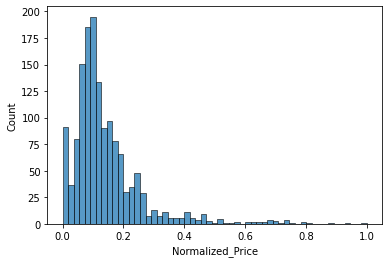

In [16]:
sns.histplot(data['Normalized_Price'])

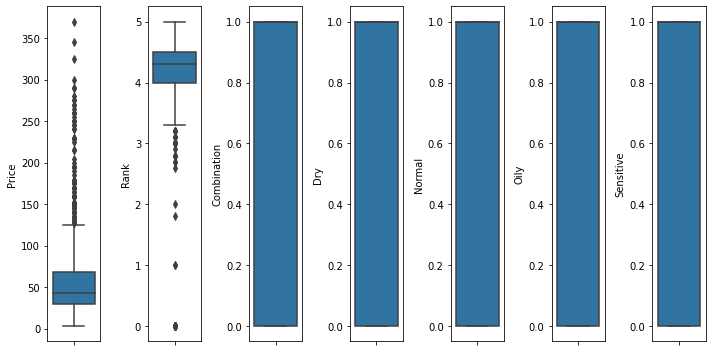

In [17]:
plt.figure(figsize=(10, 5))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=data[numericals[i]])
    plt.tight_layout()

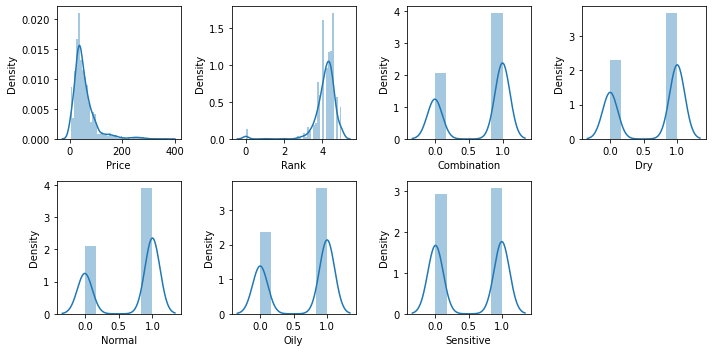

In [18]:
plt.figure(figsize=(10, 5))

for i in range(0, len(numericals)):
  plt.subplot(2, 4, i+1)
  sns.distplot(x=data[numericals[i]])
  plt.xlabel(numericals[i])
  plt.tight_layout()

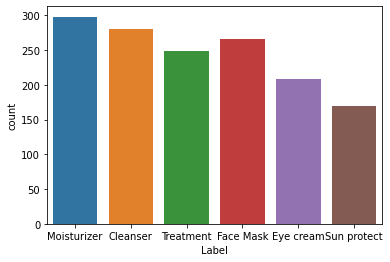

In [19]:
sns.countplot(data=data, x='Label')

# Multivariate

In [20]:
correlation = data.corr()
correlation

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive,Normalized_Price
Price,1.000000,-0.025215,0.012575,0.065525,0.049230,0.003978,0.007621,1.000000
Rank,-0.025215,1.000000,0.036904,0.026982,0.051926,0.021041,0.015946,-0.025215
Combination,0.012575,0.036904,1.000000,0.830784,0.927966,0.882528,0.689316,0.012575
Dry,0.065525,0.026982,0.830784,1.000000,0.874436,0.745767,0.722367,0.065525
Normal,0.049230,0.051926,0.927966,0.874436,1.000000,0.835227,0.713320,0.049230
Oily,0.003978,0.021041,0.882528,0.745767,0.835227,1.000000,0.648097,0.003978
Sensitive,0.007621,0.015946,0.689316,0.722367,0.713320,0.648097,1.000000,0.007621
Normalized_Price,1.000000,-0.025215,0.012575,0.065525,0.049230,0.003978,0.007621,1.000000


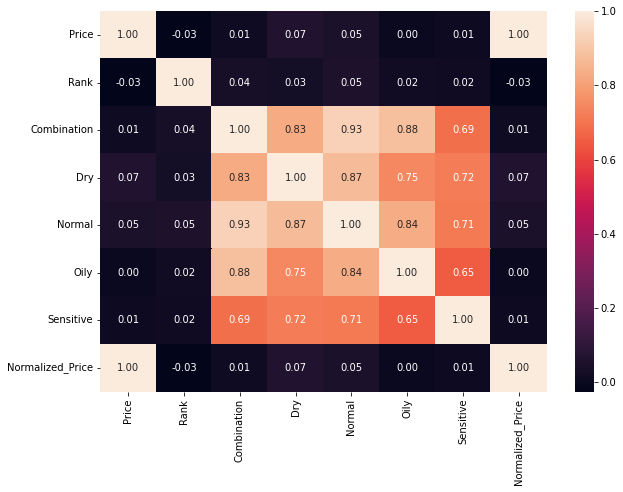

In [21]:
plt.figure(figsize=(10, 7))

sns.heatmap(correlation, annot=True, fmt='.2f')

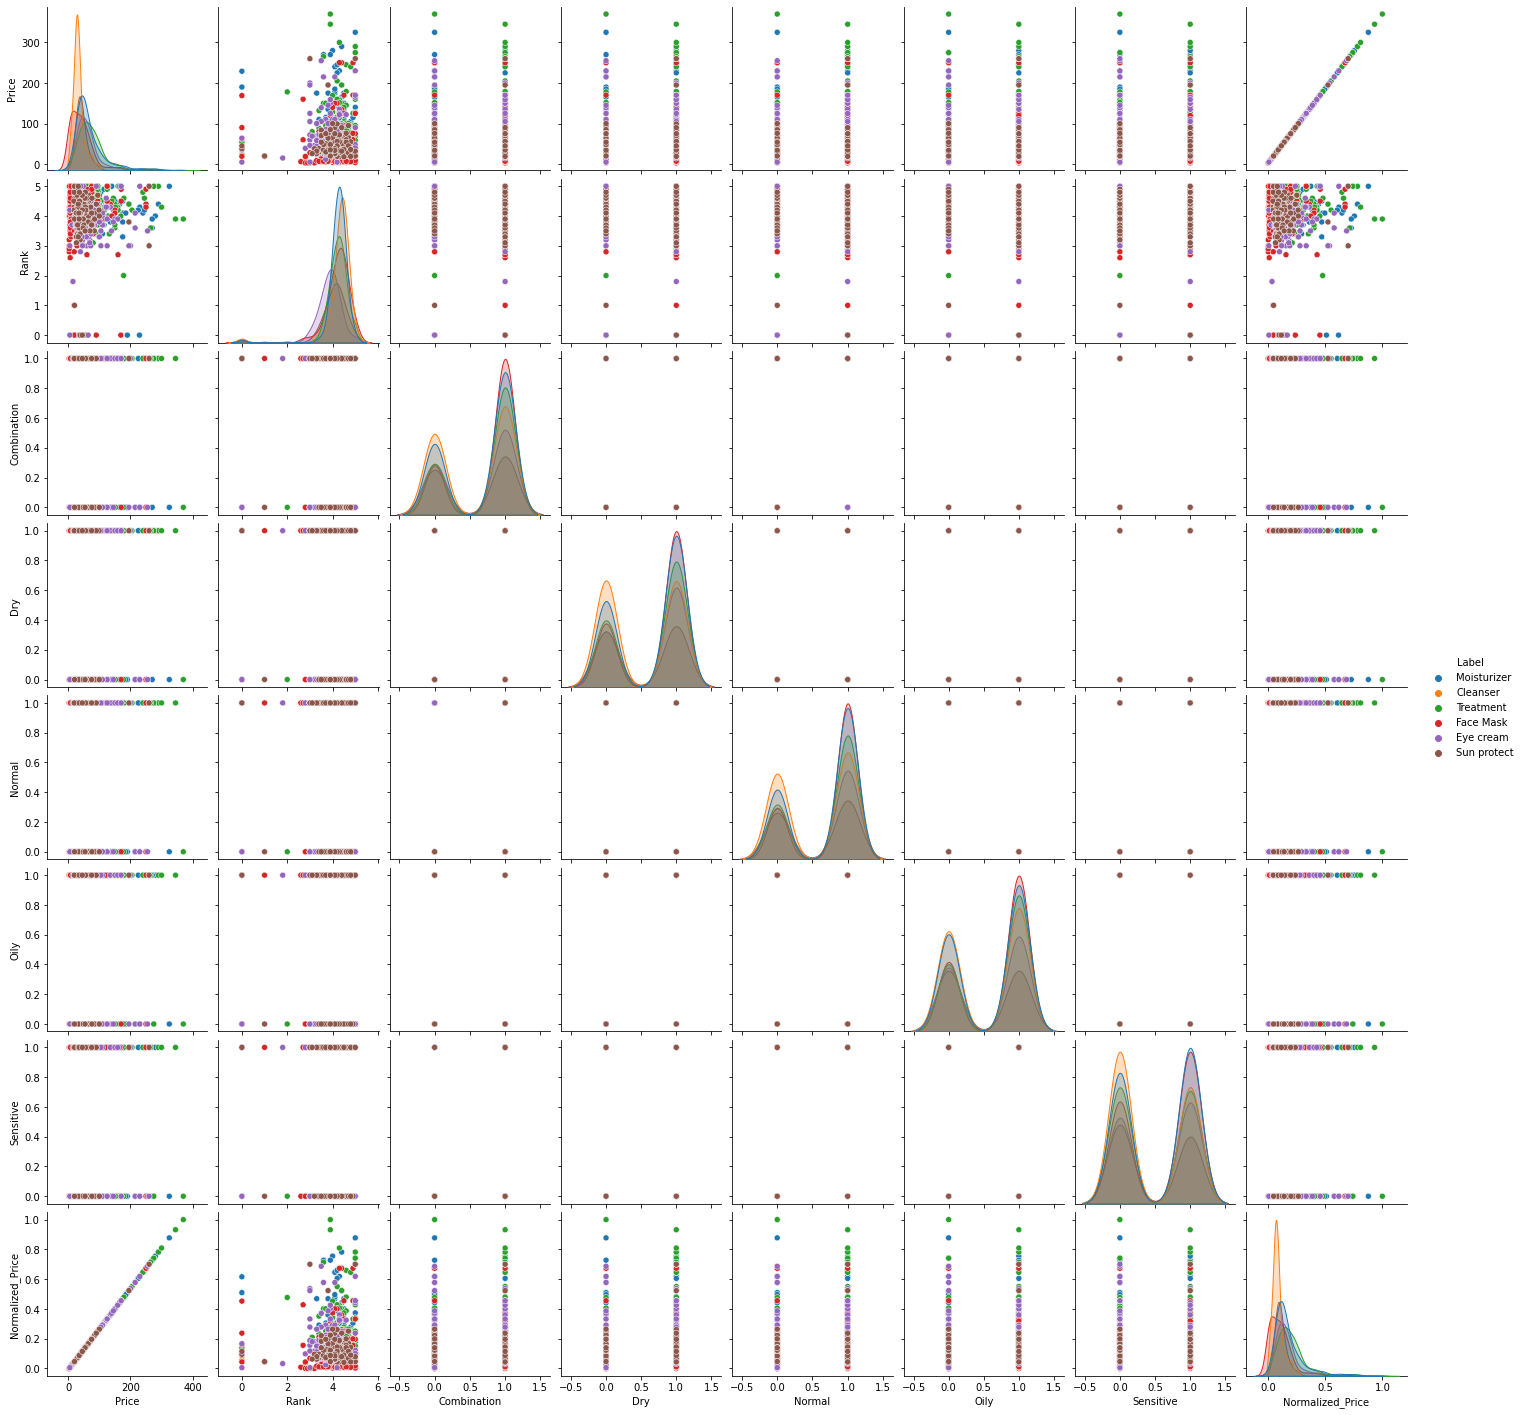

In [22]:
sns.pairplot(data, hue='Label')

### Handling using z-score
We will assume that if |𝑧|>3 then it outliers.

In [23]:
Price_mean = data['Price'].mean()
Price_std = data['Price'].std()

data[(abs(data['Price'] - Price_mean) / Price_std) < 3]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,Normalized_Price
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0.468665
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,0.479564
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,0.177112
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0.468665
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,0.095368
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1,0.087193
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0,0.122616
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0,0.138965
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0,0.046322


In [24]:
data.sort_values(by='Price', ascending=False).head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,Normalized_Price
587,Treatment,LA MER,The Concentrate,370,3.9,"Cyclopentasiloxane, Algae (Seaweed) Extract, G...",0,0,0,0,0,1.000000
601,Treatment,LA MER,The Regenerating Serum,345,3.9,"Water, Algae (Seaweed) Extract, Dimethicone, H...",1,1,1,1,1,0.931880
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0,0.877384
790,Treatment,SHISEIDO,Future Solution LX Intensive Firming Contour S...,300,4.3,"Dimethicone, Dipropylene Glycol, Glycerin, Bis...",1,1,1,1,1,0.809264
665,Treatment,BIOEFFECT,30 Day Treatment,290,5.0,"Glycerin, Water, Sodium Hyaluronate, Trometham...",1,1,1,1,1,0.782016


## Grouping

In [26]:
# Brand Price
data.groupby(['Brand', 'Label']).agg(
    total_price = ('Price', 'sum')
).sort_values('total_price', ascending=False).head(10)

,,total_price
Brand,Label,
LA MER,Moisturizer,2040
SK-II,Moisturizer,1512
SHISEIDO,Moisturizer,1476
LA MER,Treatment,1315
PETER THOMAS ROTH,Treatment,1148
MURAD,Treatment,1142
FRESH,Moisturizer,1043
PERRICONE MD,Treatment,1013
DIOR,Treatment,946


## Binning/discretization

In [ ]:
def rank_cat(x):
    if x <= 4.0:
        return 'Bad'
    elif x >= 4.0 and x <= 4.9:
        return 'Good'
    elif x == 5.0:
        return 'Best'
    
data['RankCategory'] = data['Rank'].apply(rank_cat)

In [ ]:
data.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,RankCategory
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,Good
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,Good
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,Good
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,Bad
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,Good


## Top 10 Brand of transaction

In [ ]:
top10_product = (data
                 .groupby(['RankCategory', 'Brand'])
                 .agg(total_transaction = ('Label', 'count'))
                 .reset_index()
                 .sort_values('total_transaction', ascending=False)
                 .head(10))
top10_product

,RankCategory,Brand,total_transaction
128,Good,CLINIQUE,50
195,Good,SEPHORA COLLECTION,46
196,Good,SHISEIDO,44
179,Good,MURAD,35
186,Good,ORIGINS,35
189,Good,PETER THOMAS ROTH,32
135,Good,DR. JART+,29
146,Good,FRESH,29
14,Bad,CLINIQUE,28
161,Good,KIEHL'S SINCE 1851,28
